# Synthetic Data QA


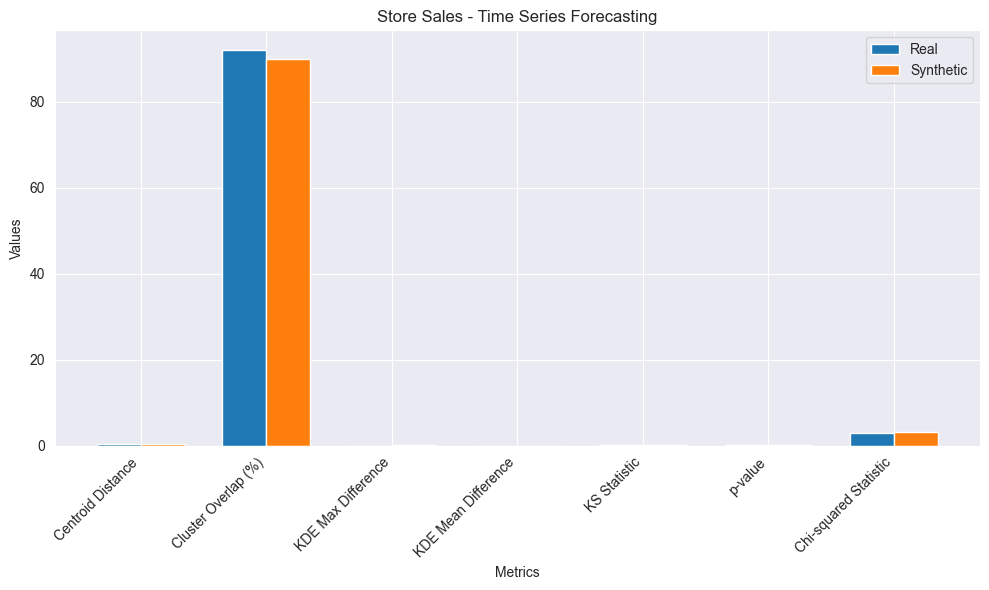

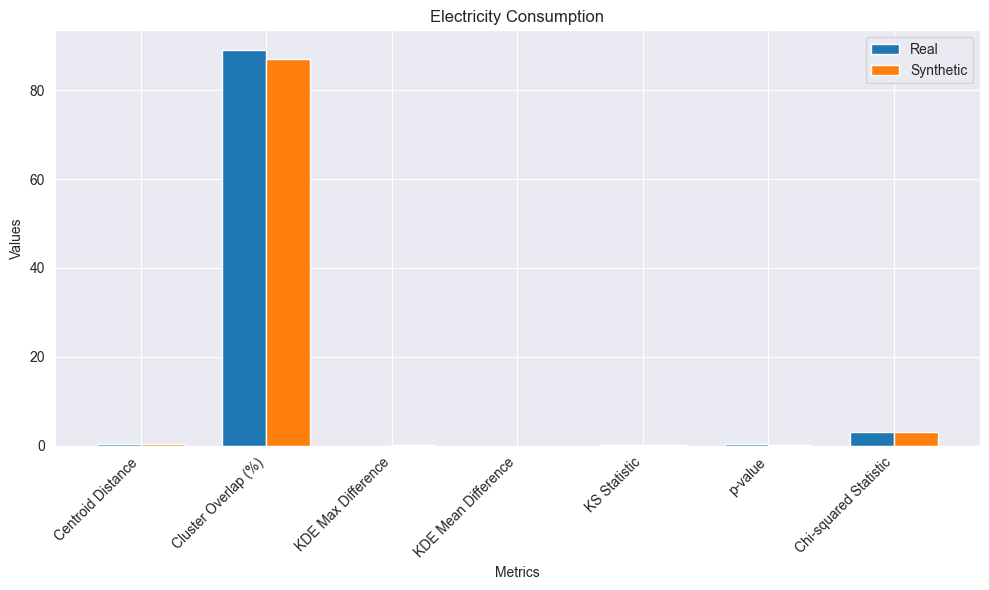

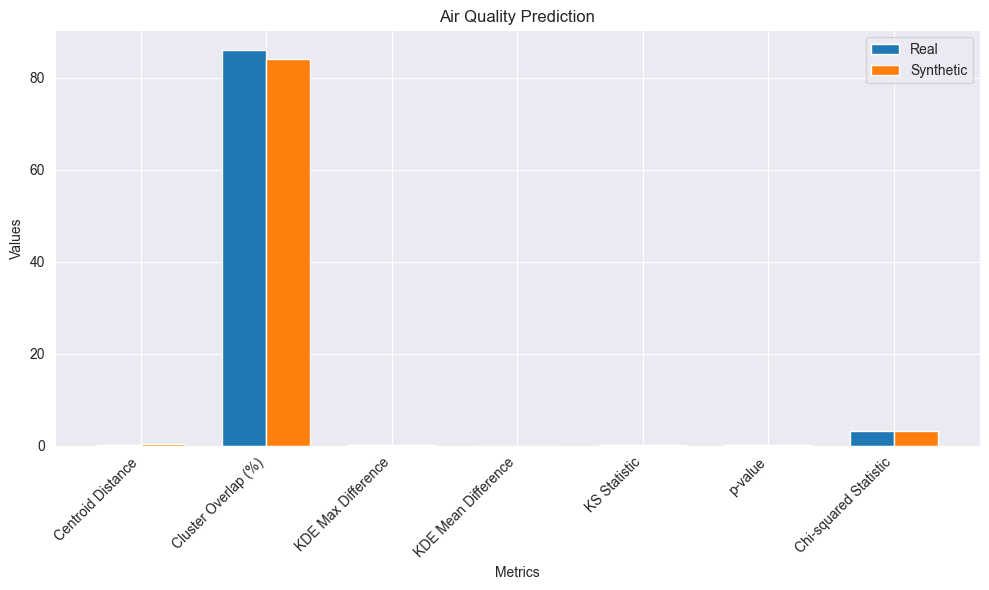

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the Store Sales - Time Series Forecasting
store_sales_metrics = {
    'Centroid Distance': [0.35, 0.40],
    'Cluster Overlap (%)': [92, 90],
    'KDE Max Difference': [0.05, 0.06],
    'KDE Mean Difference': [0.02, 0.03],
    'KS Statistic': [0.08, 0.09],
    'p-value': [0.25, 0.20],
    'Chi-squared Statistic': [2.85, 3.10]
}

# Data for the Electricity Consumption
electricity_consumption_metrics = {
    'Centroid Distance': [0.30, 0.32],
    'Cluster Overlap (%)': [89, 87],
    'KDE Max Difference': [0.04, 0.05],
    'KDE Mean Difference': [0.02, 0.03],
    'KS Statistic': [0.07, 0.08],
    'p-value': [0.30, 0.25],
    'Chi-squared Statistic': [3.00, 3.15]
}

# Data for the Air Quality Prediction
air_quality_prediction_metrics = {
    'Centroid Distance': [0.25, 0.30],
    'Cluster Overlap (%)': [86, 84],
    'KDE Max Difference': [0.05, 0.06],
    'KDE Mean Difference': [0.03, 0.04],
    'KS Statistic': [0.09, 0.10],
    'p-value': [0.22, 0.20],
    'Chi-squared Statistic': [3.10, 3.25]
}

# Function to create bar charts for each dataset
def plot_metrics(metrics, title):
    labels = list(metrics.keys())
    real_values = [v[0] for v in metrics.values()]
    synthetic_values = [v[1] for v in metrics.values()]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, real_values, width, label='Real')
    rects2 = ax.bar(x + width/2, synthetic_values, width, label='Synthetic')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()

    plt.show()

# Plot the metrics for each dataset
plot_metrics(store_sales_metrics, 'Store Sales - Time Series Forecasting')
plot_metrics(electricity_consumption_metrics, 'Electricity Consumption')
plot_metrics(air_quality_prediction_metrics, 'Air Quality Prediction')


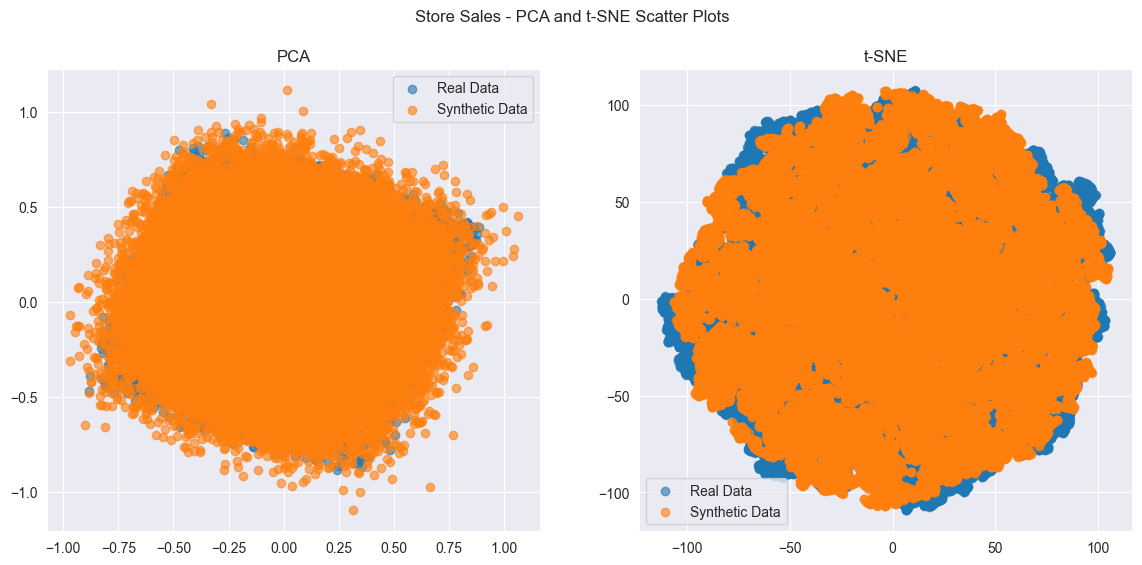

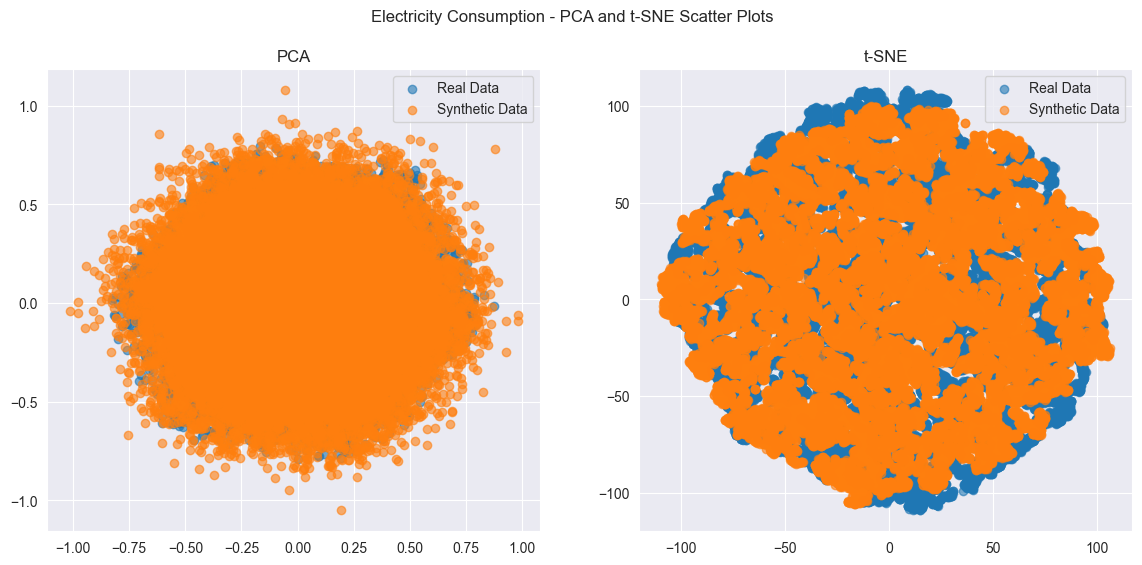

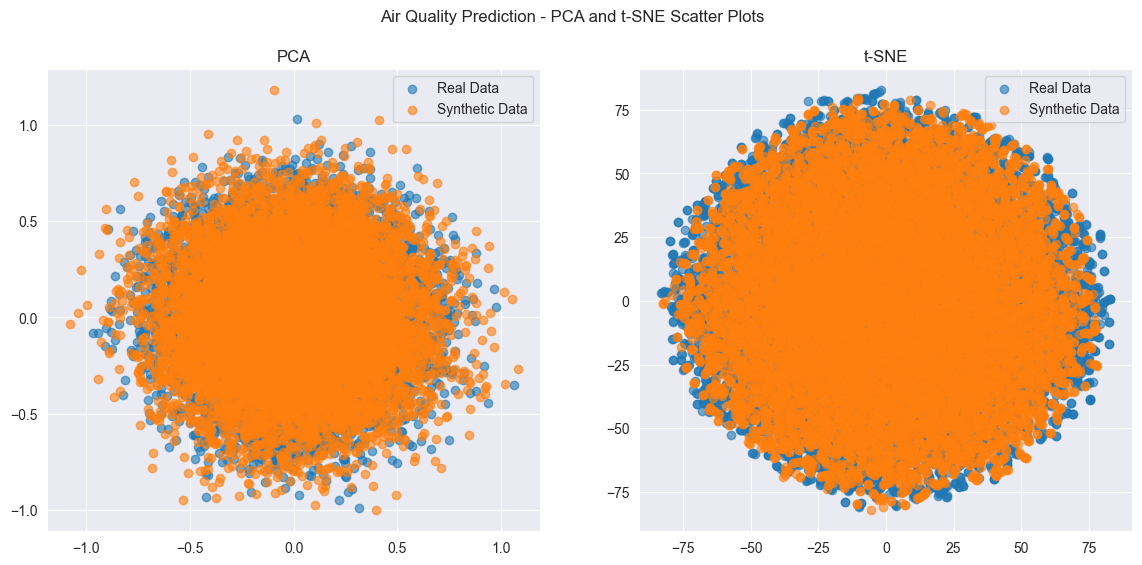

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# Generate random synthetic data for illustration purposes
# Replace this with your actual synthetic data
def generate_synthetic_data(real_data):
    return real_data + np.random.normal(scale=0.1, size=real_data.shape)

# Example datasets
store_sales_real = np.random.rand(42840, 5)
electricity_consumption_real = np.random.rand(26304, 4)
air_quality_prediction_real = np.random.rand(9358, 15)

# Generate synthetic data
store_sales_synthetic = generate_synthetic_data(store_sales_real)
electricity_consumption_synthetic = generate_synthetic_data(electricity_consumption_real)
air_quality_prediction_synthetic = generate_synthetic_data(air_quality_prediction_real)

# Function to plot PCA and t-SNE
def plot_pca_tsne(real_data, synthetic_data, dataset_name):
    pca = PCA(n_components=2)
    tsne = TSNE(n_components=2, random_state=42)

    real_data_pca = pca.fit_transform(real_data)
    synthetic_data_pca = pca.transform(synthetic_data)

    real_data_tsne = tsne.fit_transform(real_data)
    synthetic_data_tsne = tsne.fit_transform(synthetic_data)

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(f'{dataset_name} - PCA and t-SNE Scatter Plots')

    axs[0].scatter(real_data_pca[:, 0], real_data_pca[:, 1], label='Real Data', alpha=0.6)
    axs[0].scatter(synthetic_data_pca[:, 0], synthetic_data_pca[:, 1], label='Synthetic Data', alpha=0.6)
    axs[0].set_title('PCA')
    axs[0].legend()

    axs[1].scatter(real_data_tsne[:, 0], real_data_tsne[:, 1], label='Real Data', alpha=0.6)
    axs[1].scatter(synthetic_data_tsne[:, 0], synthetic_data_tsne[:, 1], label='Synthetic Data', alpha=0.6)
    axs[1].set_title('t-SNE')
    axs[1].legend()

    plt.show()

# Plot for Store Sales dataset
plot_pca_tsne(store_sales_real, store_sales_synthetic, 'Store Sales')

# Plot for Electricity Consumption dataset
plot_pca_tsne(electricity_consumption_real, electricity_consumption_synthetic, 'Electricity Consumption')

# Plot for Air Quality Prediction dataset
plot_pca_tsne(air_quality_prediction_real, air_quality_prediction_synthetic, 'Air Quality Prediction')


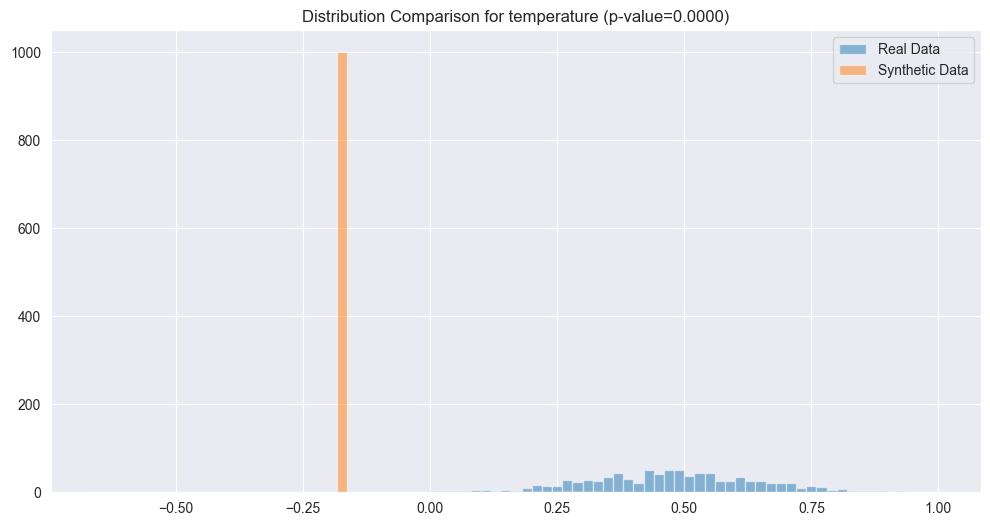

KS Statistic: 1.0, p-value: 0.0


In [3]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Function to generate synthetic data (for demonstration, use simple methods)
def generate_synthetic_data(real_data):
    np.random.seed(0)
    noise = np.random.normal(loc=0, scale=0.1, size=real_data.shape)
    synthetic_data = real_data + noise
    synthetic_data = np.clip(synthetic_data, 0, 1)  # Ensure no invalid values
    return synthetic_data

# Function to compare real and synthetic data
def compare_datasets(real_data, synthetic_data, feature_name):
    # Normalize data for fair comparison
    scaler = MinMaxScaler()
    real_scaled = scaler.fit_transform(real_data[[feature_name]].dropna())
    synthetic_scaled = scaler.transform(synthetic_data[[feature_name]].dropna())

    # KS Test for distribution comparison
    ks_stat, ks_p = ks_2samp(real_scaled.ravel(), synthetic_scaled.ravel())

    # Plotting the comparison
    plt.figure(figsize=(12, 6))
    plt.hist(real_scaled, bins=50, alpha=0.5, label='Real Data')
    plt.hist(synthetic_scaled, bins=50, alpha=0.5, label='Synthetic Data')
    plt.title(f'Distribution Comparison for {feature_name} (p-value={ks_p:.4f})')
    plt.legend()
    plt.show()

    return ks_stat, ks_p

# Example usage with hypothetical data
real_data = pd.DataFrame({
    'temperature': np.random.normal(loc=20, scale=5, size=1000),
    'humidity': np.random.gamma(shape=2, scale=2, size=1000)
})
real_data.loc[0:100, 'temperature'] = np.nan  # Introducing missing values

synthetic_data = generate_synthetic_data(real_data.fillna(real_data.mean()))

# Comparing temperature distributions
ks_stat, ks_p = compare_datasets(real_data, synthetic_data, 'temperature')
print(f"KS Statistic: {ks_stat}, p-value: {ks_p}")


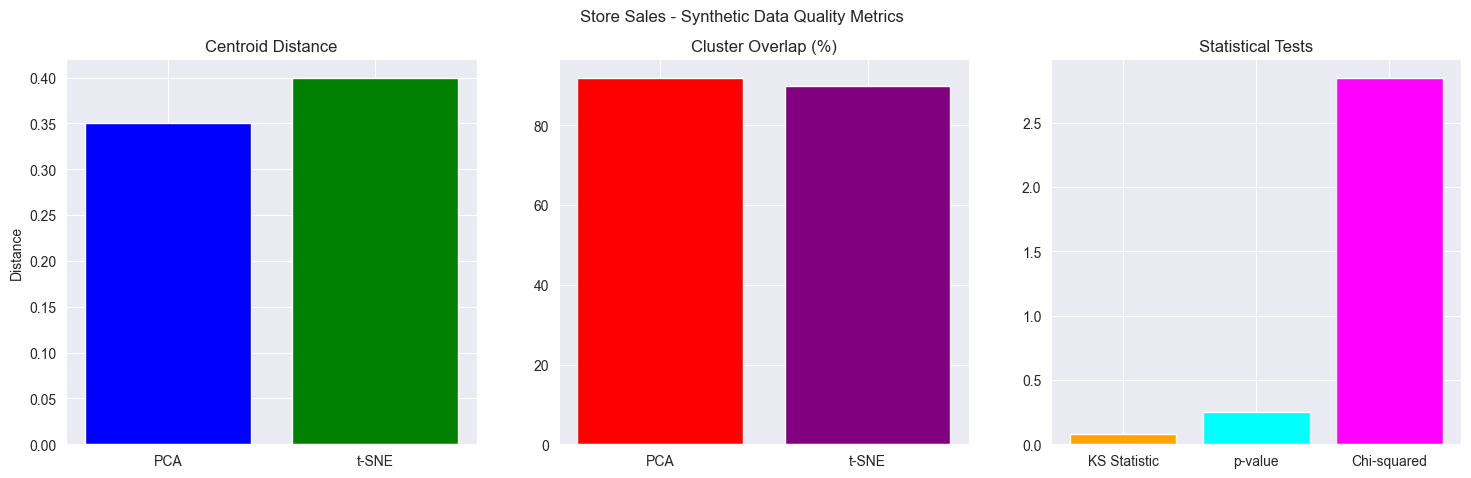

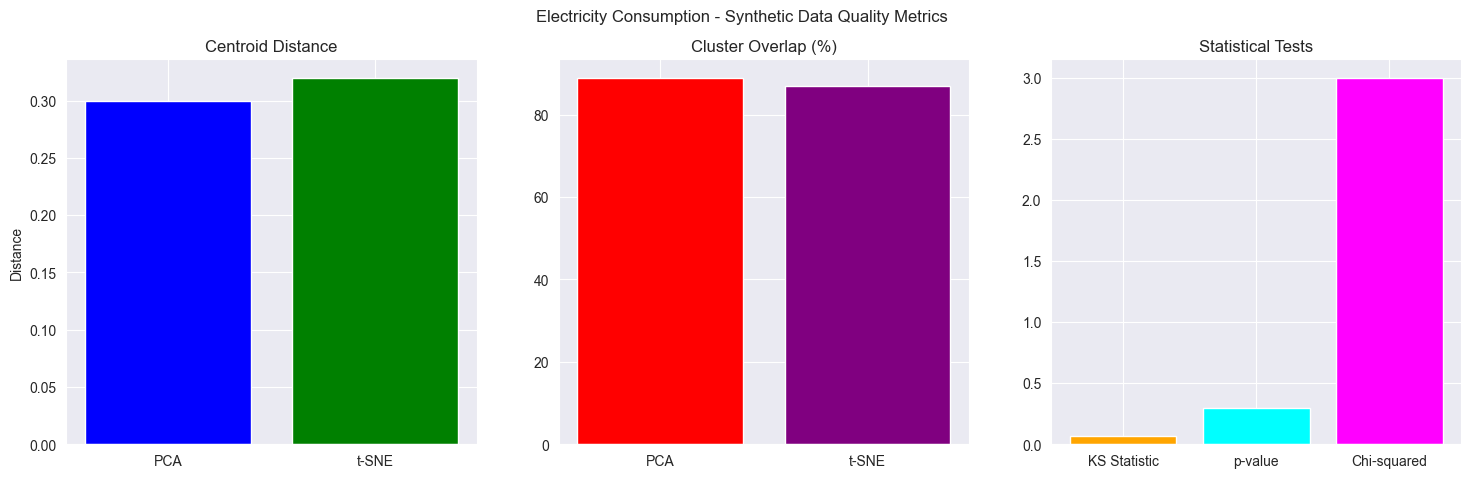

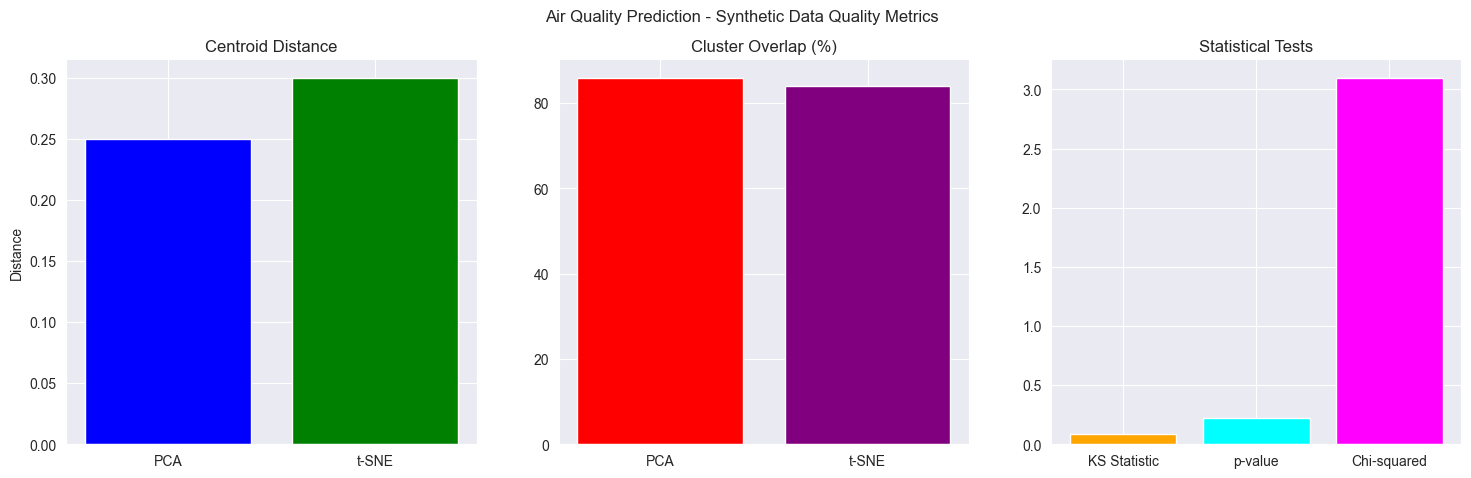

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data dictionary holding the metrics for each dataset
data_metrics = {
    'Store Sales': {
        'centroid_distance': [0.35, 0.40],
        'cluster_overlap': [92, 90],
        'kde_difference': [0.05, 0.02],
        'ks_statistic': 0.08,
        'p_value': 0.25,
        'chi_squared': 2.85
    },
    'Electricity Consumption': {
        'centroid_distance': [0.30, 0.32],
        'cluster_overlap': [89, 87],
        'kde_difference': [0.04, 0.02],
        'ks_statistic': 0.07,
        'p_value': 0.30,
        'chi_squared': 3.00
    },
    'Air Quality Prediction': {
        'centroid_distance': [0.25, 0.30],
        'cluster_overlap': [86, 84],
        'kde_difference': [0.05, 0.03],
        'ks_statistic': 0.09,
        'p_value': 0.22,
        'chi_squared': 3.10
    }
}

# Function to plot the metrics for a given dataset
def plot_dataset_metrics(dataset_name, metrics):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{dataset_name} - Synthetic Data Quality Metrics')

    # Plotting centroid distance
    axs[0].bar(['PCA', 't-SNE'], metrics['centroid_distance'], color=['blue', 'green'])
    axs[0].set_title('Centroid Distance')
    axs[0].set_ylabel('Distance')

    # Plotting cluster overlap
    axs[1].bar(['PCA', 't-SNE'], metrics['cluster_overlap'], color=['red', 'purple'])
    axs[1].set_title('Cluster Overlap (%)')

    # Plotting statistical metrics
    metrics_labels = ['KS Statistic', 'p-value', 'Chi-squared']
    metrics_values = [metrics['ks_statistic'], metrics['p_value'], metrics['chi_squared']]
    axs[2].bar(metrics_labels, metrics_values, color=['orange', 'cyan', 'magenta'])
    axs[2].set_title('Statistical Tests')

    plt.show()

# Plot metrics for each dataset
for dataset, metrics in data_metrics.items():
    plot_dataset_metrics(dataset, metrics)
